In [1]:
import pandas as pd

In [2]:
path = "resources/traffic_collision.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df["Date Occurred"] = pd.to_datetime(df["Date Occurred"])

In [5]:
df = df[["Date Occurred", "Time Occurred"]]

In [6]:
df.head()

,Date Occurred,Time Occurred
0,2019-07-13,930
1,2019-07-13,1135
2,2019-07-13,1310
3,2019-07-13,1230
4,2019-07-13,800


In [7]:
def to_minutes(time):
    if time >= 100:
        return 60 * (time // 100) + (time % 100)
    else:
        return time

In [8]:
df["Time Occurred"] = df["Time Occurred"].map(to_minutes)

In [9]:
def round_30_min(time):
    if time < 1425:
        if time % 30 < 15:
            return time - (time % 30)
        else:
            return time + (30 - time % 30)
    else:
        return 0

In [10]:
times = df["Time Occurred"].map(round_30_min)
# times = df[df["Time Occurred"] % 30 == 0]["Time Occurred"]

In [11]:
plot_values = times.value_counts()

In [12]:
plot_values = plot_values.sort_index()

In [13]:
import matplotlib.pyplot as plt

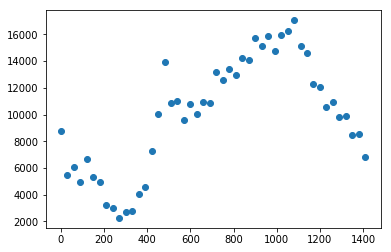

In [14]:
plt.scatter(plot_values.index, plot_values)

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

In [16]:
X = np.array(plot_values.index).reshape(-1,1)
y = plot_values.values

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .3)

In [55]:
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [56]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [57]:
times = []
for hour in range(24):
    for minute in ["00","30"]:
        times.append(str(hour) + ":" + minute)


In [58]:
times[:10]

['0:00',
 '0:30',
 '1:00',
 '1:30',
 '2:00',
 '2:30',
 '3:00',
 '3:30',
 '4:00',
 '4:30']

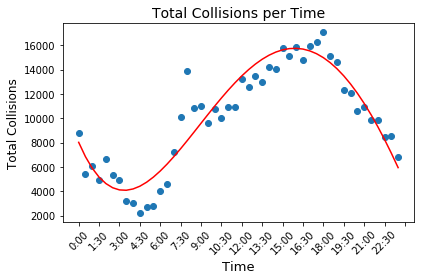

In [59]:
plt.scatter(times, y)
plt.title("Total Collisions per Time", fontsize = 14)
plt.xlabel("Time", fontsize=13)
plt.ylabel("Total Collisions", fontsize = 12)
plt.plot(times, model.predict(poly.fit_transform(X)), color="red")
plt.xticks(np.arange(0, 49, 3), rotation=45)
plt.tight_layout()
plt.savefig("charts/Collisions_per_time.png")

In [60]:
model.score(X_test_poly, y_test)

0.9102282702348024

In [61]:
model.score(X_train_poly, y_train)

0.8583411875546498

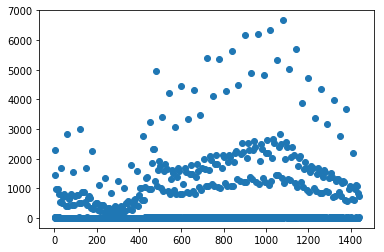

In [67]:
times_all = df["Time Occurred"].value_counts()
plt.scatter(times_all.index, times_all)

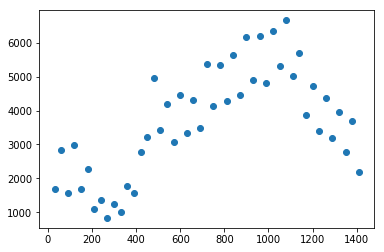

In [71]:
times_30 = df[df["Time Occurred"] % 30 == 0]["Time Occurred"].value_counts()
plt.scatter(times_30.index, times_30)